# Source

Data downloaded from here: https://data.gesis.org/tweetscov19/#dataset

Data should be stored in `./data`

Coulmn Names:
1. Tweet Id: Long. - NOT USED
2. Username: String. Encrypted for privacy issues. - NOT USED

3. Timestamp: Format ( "EEE MMM dd HH:mm:ss Z yyyy" ). ISOString => integer (e.g. 23517957).

4. #Followers: Integer.
5. #Friends: Integer.
6. #Retweets: Integer.
7. #Favorites: Integer.

8. Entities: String. For each entity, we aggregated the original text, the annotated entity and the produced score from FEL library. Each entity is separated from another entity by char ";". Also, each entity is separated by char ":" in order to store "original_text:annotated_entity:score;". If FEL did not find any entities, we have stored "null;".
9. Sentiment: String. SentiStrength produces a score for positive (1 to 5) and negative (-1 to -5) sentiment. We splitted these two numbers by whitespace char " ". Positive sentiment was stored first and then negative sentiment (i.e. "2 -1").

10. Mentions: String. If the tweet contains mentions, we remove the char "@" and concatenate the mentions with whitespace char " ". If no mentions appear, we have stored "null;".
11. Hashtags: String. If the tweet contains hashtags, we remove the char "#" and concatenate the hashtags with whitespace char " ". If no hashtags appear, we have stored "null;".

12. URLs: String: If the tweet contains URLs, we concatenate the URLs using ":-: ". If no URLs appear, we have stored "null;"

In [1]:
# imports
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
header = [
    "Tweet Id", 
    "Username", 
    "Timestamp", 
    "#Followers",
    "#Friends",
    "#Retweets",
    "#Favorites",
    "Entities",
    "Sentiment",
    "Mentions",
    "Hashtags",
    "URLs"
]

data = pd.read_csv("./data/TweetsCOV19_052020.tsv.gz", compression='gzip', names=header, sep='\t', quotechar='"')

In [3]:
data.head(10)

,Tweet Id,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,Thu Apr 30 22:00:24 +0000 2020,29697,24040,0,0,null;,1 -1,null;,Opinion Next2blowafrica thoughts,null;
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,Thu Apr 30 22:03:52 +0000 2020,799,1278,4,6,null;,1 -1,null;,null;,null;
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,Thu Apr 30 22:03:58 +0000 2020,586,378,1,2,null;,2 -1,null;,null;,https://www.bbc.com/news/uk-england-beds-bucks...
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,Thu Apr 30 22:04:52 +0000 2020,237,168,0,0,null;,1 -1,null;,null;,https://lockdownsceptics.org/2020/04/30/latest...
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,Thu Apr 30 22:05:18 +0000 2020,423,427,0,0,i hate u:I_Hate_U:-1.8786140035817729;quaranti...,1 -4,null;,null;,null;
5,1255982235662024704,491a98bbc105806cb67f46f5e3f3d888,Thu Apr 30 22:07:54 +0000 2020,52,46,0,0,god forbid:God_Forbid:-1.2640735877261988;covi...,2 -4,Danartman BishopStika,null;,https://www.dailymail.co.uk/health/article-826...
6,1255982852371554304,916dec763c84916c929bb257ff96187d,Thu Apr 30 22:10:21 +0000 2020,70185,10625,213,926,beijing:Beijing:-1.4222174822860647;covid 19:C...,1 -4,null;,null;,https://canoe.com/news/world/u-s-mulling-poten...
7,1255983890524786689,86e70e2bdc63363a4fecce1c9ba60e0f,Thu Apr 30 22:14:29 +0000 2020,507,379,5,6,null;,1 -4,null;,null;,https://www.dispatch.com/news/20200430/conditi...
8,1255985637246865410,d6fff22276aad81631affdecb83a8d9a,Thu Apr 30 22:21:25 +0000 2020,101,127,0,0,stealth:Stealth_game:-2.646174787470186;,1 -3,null;,null;,http://www.safetyhealthnews.com/covid-prompted...
9,1255985687062601729,2af96845573e5256307de4504c9051fc,Thu Apr 30 22:21:37 +0000 2020,414,2151,1,3,quarantine:Quarantine:-2.3096035868012508;,3 -2,AlanCane604,COVID19.,null;


In [4]:
len(data)

1912070

In [5]:
base_url = "https://api.twitter.com/2/tweets"
tweet_id = "1255985687062601729"

res = requests.get(f"{base_url}/{tweet_id}")
print(res) # error because need Auth: Bearer <token>, but this requires tweeter developer account

<Response [401]>


In [6]:
data[data['#Retweets'] != 0]

,Tweet Id,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,Thu Apr 30 22:03:52 +0000 2020,799,1278,4,6,null;,1 -1,null;,null;,null;
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,Thu Apr 30 22:03:58 +0000 2020,586,378,1,2,null;,2 -1,null;,null;,https://www.bbc.com/news/uk-england-beds-bucks...
6,1255982852371554304,916dec763c84916c929bb257ff96187d,Thu Apr 30 22:10:21 +0000 2020,70185,10625,213,926,beijing:Beijing:-1.4222174822860647;covid 19:C...,1 -4,null;,null;,https://canoe.com/news/world/u-s-mulling-poten...
7,1255983890524786689,86e70e2bdc63363a4fecce1c9ba60e0f,Thu Apr 30 22:14:29 +0000 2020,507,379,5,6,null;,1 -4,null;,null;,https://www.dispatch.com/news/20200430/conditi...
9,1255985687062601729,2af96845573e5256307de4504c9051fc,Thu Apr 30 22:21:37 +0000 2020,414,2151,1,3,quarantine:Quarantine:-2.3096035868012508;,3 -2,AlanCane604,COVID19.,null;
10,1255985760790069251,c8f0b58eb5105e2318e15ff17b9e4250,Thu Apr 30 22:21:55 +0000 2020,722,572,4,33,fred guttenberg:Fred_Guttenberg:-1.35898888441...,1 -1,fred_guttenberg GovWhitmer,null;,null;
11,1255986390803890179,d2c476ec35a8274be8a7e16ccd3cee49,Thu Apr 30 22:24:25 +0000 2020,32756,3035,15,7,kaduna:Kaduna:-1.6483966010617883;kano:Kano:-2...,1 -1,MubarakBala,FreeMubarakBala,null;
13,1255990446582575109,a97b14453e6bff7957c0e79058ddcb32,Thu Apr 30 22:40:32 +0000 2020,6,2,1,2,mayday:Mayday_%28Canadian_TV_series%29:-2.4274...,1 -1,null;,null;,null;
14,1255993051161546752,ed54b52688d4a550d43e68d843f2cb2d,Thu Apr 30 22:50:53 +0000 2020,183,427,1,0,leukemia:Leukemia:-1.5352150015828259;all blac...,3 -3,null;,adoptables blackcats beautifulcats rescue cats...,null;
19,1255996489614196743,85bc7878f69dcc52b76f707a3cb957aa,Thu Apr 30 23:04:33 +0000 2020,4542,1248,4,2,wicked:Wicked_%28musical%29:-2.851585888829314;,3 -3,null;,null;,null;


In [7]:
data['#Retweets'].describe()

count    1.912070e+06
mean     3.573729e+01
std      4.604673e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.000000e+00
max      2.574670e+05
Name: #Retweets, dtype: float64

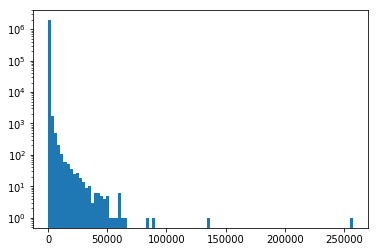

In [8]:
plt.hist(data['#Retweets'], log=True, bins=100) 
plt.show()

In [21]:
sorted_by_retweets = data.sort_values(by='#Retweets', ascending=False)
sorted_by_retweets.head(100)

,Tweet Id,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
1637862,1265465820995411973,0d4d9b3135ab4271ea36f4ebf8e9eae9,Wed May 27 02:12:17 +0000 2020,3317,3524,257467,845579,tear gas:Tear_gas:-1.688018296396458;,1 -1,null;,null;,null;
1208647,1266553959973445639,c9378a990def5939fb179e034a0d402e,Sat May 30 02:16:10 +0000 2020,18661,0,135818,363852,null;,1 -3,null;,null;,null;
1328169,1258750892448387074,1921c65230cd080c689dc82ea62e6e74,Fri May 08 13:29:33 +0000 2020,83320,1753,88667,224288,mike pence:Mike_Pence:-0.6712149436851893;ppe:...,1 -1,null;,null;,null;
1736035,1263579286201446400,7c4529bc4da01f288b95cd3876b4da47,Thu May 21 21:15:52 +0000 2020,451,359,82495,225014,null;,1 -1,null;,null;,null;
751238,1266546753182056453,32634ab407c86a56dde59551b3871c42,Sat May 30 01:47:31 +0000 2020,1545,874,66604,193599,douche:Douche:-2.0041883604919835;,3 -1,null;,null;,null;
702118,1259975524581064704,69745f3009b864ba75b7d066ade0adba,Mon May 11 22:35:48 +0000 2020,6106969,726,63054,248214,null;,1 -1,null;,null;,null;
1037044,1266738565641371648,71b9c38db144b44e4cbbda75c9fbf272,Sat May 30 14:29:43 +0000 2020,45941,4550,61422,100570,null;,1 -1,null;,null;,null;
482286,1267066200049229824,56eb2d106e7611ab8bb76de07af8f318,Sun May 31 12:11:37 +0000 2020,678,524,61038,101117,quarantine:Quarantine:-2.3096035868012508;,2 -1,null;,null;,null;
1812643,1256657625334284292,6b7cc62c18b45d1eee1c34eb375e72a4,Sat May 02 18:51:40 +0000 2020,778,694,60719,213614,null;,1 -1,null;,null;,null;
1401494,1260237550091935746,6b49e6ca36daebd1048d59b1459026ae,Tue May 12 15:57:00 +0000 2020,3704,1144,60650,214508,flatten the curve:Flatten_the_curve:-1.6515462...,1 -1,null;,null;,null;


Sad life. Apparently, most high retweets have no mentions and hashtags... T.T my work is useless honestly.

In [98]:
total_retweets = sorted_by_retweets['#Retweets'].sum()

In [103]:
sorted_by_retweets['#Retweets'] = sorted_by_retweets['#Retweets'].apply(lambda x: x / total_retweets).cumsum()
sorted_by_retweets[sorted_by_retweets['#Retweets'] < 0.1]

,Tweet Id,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
1637862,1265465820995411973,0d4d9b3135ab4271ea36f4ebf8e9eae9,Wed May 27 02:12:17 +0000 2020,3317,3524,5.514050e-11,845579,tear gas:Tear_gas:-1.688018296396458;,1 -1,null;,null;,null;
1208647,1266553959973445639,c9378a990def5939fb179e034a0d402e,Sat May 30 02:16:10 +0000 2020,18661,0,1.393685e-10,363852,null;,1 -3,null;,null;,null;
1328169,1258750892448387074,1921c65230cd080c689dc82ea62e6e74,Fri May 08 13:29:33 +0000 2020,83320,1753,2.425859e-10,224288,mike pence:Mike_Pence:-0.6712149436851893;ppe:...,1 -1,null;,null;,null;
1736035,1263579286201446400,7c4529bc4da01f288b95cd3876b4da47,Thu May 21 21:15:52 +0000 2020,451,359,3.634709e-10,225014,null;,1 -1,null;,null;,null;
751238,1266546753182056453,32634ab407c86a56dde59551b3871c42,Sat May 30 01:47:31 +0000 2020,1545,874,4.986201e-10,193599,douche:Douche:-2.0041883604919835;,3 -1,null;,null;,null;
702118,1259975524581064704,69745f3009b864ba75b7d066ade0adba,Mon May 11 22:35:48 +0000 2020,6106969,726,6.472733e-10,248214,null;,1 -1,null;,null;,null;
1037044,1266738565641371648,71b9c38db144b44e4cbbda75c9fbf272,Sat May 30 14:29:43 +0000 2020,45941,4550,8.090810e-10,100570,null;,1 -1,null;,null;,null;
482286,1267066200049229824,56eb2d106e7611ab8bb76de07af8f318,Sun May 31 12:11:37 +0000 2020,678,524,9.839609e-10,101117,quarantine:Quarantine:-2.3096035868012508;,2 -1,null;,null;,null;
1812643,1256657625334284292,6b7cc62c18b45d1eee1c34eb375e72a4,Sat May 02 18:51:40 +0000 2020,778,694,1.171845e-09,213614,null;,1 -1,null;,null;,null;
1401494,1260237550091935746,6b49e6ca36daebd1048d59b1459026ae,Tue May 12 15:57:00 +0000 2020,3704,1144,1.372718e-09,214508,flatten the curve:Flatten_the_curve:-1.6515462...,1 -1,null;,null;,null;


# Hashtag Analysis

In [54]:
non_null_sorted_by_retweets = sorted_by_retweets[(sorted_by_retweets['Hashtags'] != "null;")].dropna()
non_null_sorted_by_retweets

,Tweet Id,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
598492,1256612827353186304,baaebee90644fc4ccc06611f64465bbe,Sat May 02 15:53:39 +0000 2020,874902,317715,34041,42209,candace owens:Candace_Owens:-0.999615633574890...,2 -3,null;,FreeCandace,null;
241270,1265612757686247424,446719c32e06f77c04a7cb3830387b79,Wed May 27 11:56:10 +0000 2020,203471,2452,32701,70253,null;,1 -1,null;,GeorgeFloyd,null;
765527,1266557801549033472,53ec20da8da2e3a009b42b766f95dc2c,Sat May 30 02:31:26 +0000 2020,2108,664,27128,28238,miscarriage:Miscarriage:-1.8647743064156135;st...,2 -3,null;,emeraldblack,null;
26652,1265757043819978754,149c9d80f1d39fb875258e65bd72d785,Wed May 27 21:29:30 +0000 2020,27273,468,27029,55118,null;,2 -4,null;,SeanReed,null;
496852,1267108579011629057,285ace0a0f076da4c1e99c8030136478,Sun May 31 15:00:01 +0000 2020,8022934,4,21759,36204,baekhyun:Byun_Baek-hyun:-0.9476158482117225;ba...,3 -1,null;,백현 BAEKHYUN 엑소 EXO weareoneEXO Delight Candy B...,null;
1120646,1264721468761481216,1cba75eb03b52bda86af3b32024a24c0,Mon May 25 00:54:30 +0000 2020,4647,373,18727,107977,grocery store:Grocery_store:-2.461220162781418;,1 -1,null;,Coronavirus,null;
913717,1259377633608953857,9a9bc03bba731be569c5a2023f0a3687,Sun May 10 07:00:00 +0000 2020,1346969,8,18521,35290,superm:SuperM:-1.1826695259859505;superm:Super...,2 -1,null;,StayHomeWithSuperM 4 SuperM WeAreTheFuture Sup...,null;
401411,1259635624786739202,de521ee3df4d95eca4437dc9a2e32d7f,Mon May 11 00:05:10 +0000 2020,628217,5192,17968,59174,null;,2 -1,null;,coronavirus WhiteHouse COVID19,null;
1738497,1265821476390871040,ea3edc631abcd328d878142d92e683c1,Thu May 28 01:45:32 +0000 2020,225973,3374,17788,53593,twitter:Twitter:-1.1708686827892931;ppe:Philos...,1 -3,realDonaldTrump,ExecutiveOrder coronavirus.,null;
1428135,1258543571101036544,e8cd8647fc33b45fe1d71dc3f4ac91cb,Thu May 07 23:45:44 +0000 2020,2359669,5126,17781,39541,wire tapping:Telephone_tapping:-2.527478622812...,1 -1,null;,FakeNews DeepStateScum,https://www.foxnews.com/politics/obama-knew-de...


Note how even though tweet with "FreeCandace" has high retweet, but the actual hashtag count is very low (around 10). This is common for non-corona virus or non-human person Hashtags. For these reasons, we should just consider the top 20% of hashtags by frequency which should mention corona or some entity name (person most likely). We treat the rest as null.

In [55]:
len(non_null_sorted_by_retweets)

563167

In [117]:
non_null_sorted_by_retweets[['#Retweets', 'Hashtags']]

,#Retweets,Hashtags
176577,45181,null;
1725446,42940,null;
294133,27854,null;
586930,24815,null;
200679,23589,null;
1502516,21243,null;
822522,20130,null;
1107548,19781,null;
1738497,17788,ExecutiveOrder coronavirus.
668468,17240,null;


In [64]:
hashtag_counts = {}
delimiter = " "
total = 0

for idx, row in non_null_sorted_by_retweets.iterrows():
    values = row['Hashtags'].split(delimiter)
    
    for value in values:
        value = value.replace(",", "") # remove those ending with a comma
        if value not in hashtag_counts: hashtag_counts[value] = 1
        else: hashtag_counts[value] += 1
        total += 1

hashtag_counts

{'FreeCandace': 10,
 'GeorgeFloyd': 1418,
 'emeraldblack': 3,
 'SeanReed': 28,
 '백현': 57,
 'BAEKHYUN': 89,
 '엑소': 67,
 'EXO': 255,
 'weareoneEXO': 21,
 'Delight': 34,
 'Candy': 9,
 'BAEKHYUN_Candy': 28,
 '큥이_에리_기가막힌_케미스트리': 15,
 'Coronavirus': 7864,
 'StayHomeWithSuperM': 30,
 '4': 142,
 'SuperM': 40,
 'WeAreTheFuture': 15,
 'SuperMTheFuture': 16,
 'StayHome': 8157,
 'StayHomeChallenge': 43,
 'SuperM_Truth_Or_Dare': 8,
 'coronavirus': 30224,
 'WhiteHouse': 116,
 'COVID19': 67270,
 'ExecutiveOrder': 65,
 'coronavirus.': 1452,
 'FakeNews': 674,
 'DeepStateScum': 1,
 'AtlantaRiots': 10,
 'ATLFORUS': 2,
 'BlackLivesMatter': 3378,
 'BlackLivesMatters': 359,
 'ExposeCBS': 103,
 'GOT7': 418,
 '갓세븐': 169,
 'IGOT7': 37,
 '아가새': 11,
 'BamBam': 42,
 '뱀뱀': 10,
 'UNICEF_Thailand': 2,
 'LoveDeliveryFest': 16,
 'โควิด19': 63,
 'COVID19.': 6467,
 'Favorite': 2,
 'time': 41,
 'atHome': 5,
 'Quarantine': 1860,
 'Yummy': 10,
 'tothe': 2,
 'tummy': 4,
 'Mukbang': 2,
 'Wallpaper': 4,
 'BT21': 16,
 'WWG1WGA

In [65]:
total

1534216

In [90]:
hashtags_sorted_by_frequency = sorted(hashtag_counts.items(), key=lambda item: item[1], reverse=True)

cutoff = 0.2
most_popular_hastags = []

cum_sum = 0
for (hashtag, frequency) in hashtags_sorted_by_frequency:
    if frequency <= 500: break # skip all tags that just occur once
    
    percentage = frequency / total
    cum_sum += percentage
    if (cum_sum < cutoff): most_popular_hastags.append((hashtag, cum_sum))
    else: break

most_popular_hastags

[('COVID19', 0.04384649879808319),
 ('coronavirus', 0.06354646281879474),
 ('Covid_19', 0.07072211474785818),
 ('covid19', 0.07759142128618134),
 ('May', 0.08373918665950555),
 ('+0000', 0.08987717505227424),
 ('Covid19', 0.09598909149689482),
 ('lockdown', 0.10204169425947844),
 ('COVIDー19', 0.10804084952835845),
 ('StayHome', 0.11335757155446169),
 ('Coronavirus', 0.11848331656038003),
 ('COVID19.', 0.12269849877722563),
 ('China', 0.1259705282698134),
 ('COVID', 0.12897857928740153),
 ('StaySafe', 0.1317806619146196),
 ('staysafe', 0.13450583229480073),
 ('COVID__19', 0.13707848177831544),
 ('IndiaFightsCorona', 0.13949013698201557),
 ('StayAtHome', 0.14172971732793818),
 ('BlackLivesMatter', 0.14393149334904604),
 ('SocialDistancing', 0.1458790678757098),
 ('stayhome', 0.147803829447744),
 ('pandemic', 0.14964646438311166),
 ('ObamaGate', 0.1513672129608869),
 ('COVID19,', 0.15304363922681033),
 ('Lockdown', 0.15463402806384502),
 ('StayHomeSaveLives', 0.15620747013458344),
 ('Coro

In [76]:
array = np.array(most_popular_hastags)
np.savetxt("./data/popular_hashtags.csv", array, delimiter=", ", fmt='%s', encoding='utf8')

We just consider the top 20% of the most popular hashtags by frequency. The rest will be marked as null. This results in 69 + 1 (null) labels for hashtags giving one-hot vector of size 70.

# Mentions Analysis

We follow similar pattern to generate list of popular mentions

In [10]:
sorted_by_retweets = data.sort_values(by='#Retweets', ascending=False)
non_null_sorted_by_retweets = sorted_by_retweets[(sorted_by_retweets['Mentions'] != "null;")].dropna()
non_null_sorted_by_retweets

,Tweet Id,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
176577,1259498452175720455,d3ab3e7df0d626f98bb84c9a97982d4d,Sun May 10 15:00:06 +0000 2020,3841032,357,45181,17346,nintendo switch:Nintendo_Switch:-0.71443975930...,2 -1,ColorWare,null;,null;
1725446,1266889115288711168,d5108f6ddcb2684f864d04d3c7def7af,Sun May 31 00:27:57 +0000 2020,1268,2243,42940,78580,nypd:New_York_City_Police_Department:-1.953525...,1 -4,NYCSpeakerCoJo BPEricAdams FarahNLouis Jumaane...,null;,null;
294133,1261368451555360774,75224fc65ae453fe9ec3ca855cd8619b,Fri May 15 18:50:48 +0000 2020,79876331,46,27854,112007,the invisible enemy:The_Invisible_Enemy_%28Doc...,2 -2,narendramodi,null;,null;
586930,1258537649368739840,f5636375bb151085d00b0d09e86e53b1,Thu May 07 23:22:12 +0000 2020,1571,639,24815,41715,null;,1 -1,gmpolice,null;,null;
200679,1256243856166850560,75224fc65ae453fe9ec3ca855cd8619b,Fri May 01 15:27:29 +0000 2020,79139498,46,23589,80780,cnn:CNN:-0.9113024985533761;fake news:Fake_new...,3 -2,CNN,null;,null;
1502516,1260303075111325697,a9da346cffc93d6215f6c75d6fabbc89,Tue May 12 20:17:23 +0000 2020,5400774,26,21243,63912,president trump:Donald_Trump:-2.5297230987882484;,2 -3,senatemajldr.,null;,https://www.politico.com/news/2020/03/25/trump...
822522,1266346957611708417,75224fc65ae453fe9ec3ca855cd8619b,Fri May 29 12:33:36 +0000 2020,80530673,46,20130,67219,adam schiff:Adam_Schiff:-0.8114747158267428;tw...,1 -3,MariaBartiromo foxandfriends,null;,null;
1107548,1265787518974377991,5657cf21511c0af9cf7e131040cf704f,Wed May 27 23:30:36 +0000 2020,72412,1247,19781,43136,republican:Republican_Party_%28United_States%2...,3 -2,MikeTurzai,null;,null;
1738497,1265821476390871040,ea3edc631abcd328d878142d92e683c1,Thu May 28 01:45:32 +0000 2020,225973,3374,17788,53593,twitter:Twitter:-1.1708686827892931;ppe:Philos...,1 -3,realDonaldTrump,ExecutiveOrder coronavirus.,null;
668468,1256570859935932416,75224fc65ae453fe9ec3ca855cd8619b,Sat May 02 13:06:53 +0000 2020,79243485,46,17240,64475,brian p monahan:Brian_P._Monahan:-1.6992231548...,2 -1,MarkMeadows,null;,null;


In [11]:
len(non_null_sorted_by_retweets)

824233

In [12]:
non_null_sorted_by_retweets[['#Retweets', 'Mentions']]

,#Retweets,Mentions
176577,45181,ColorWare
1725446,42940,NYCSpeakerCoJo BPEricAdams FarahNLouis Jumaane...
294133,27854,narendramodi
586930,24815,gmpolice
200679,23589,CNN
1502516,21243,senatemajldr.
822522,20130,MariaBartiromo foxandfriends
1107548,19781,MikeTurzai
1738497,17788,realDonaldTrump
668468,17240,MarkMeadows


In [13]:
mention_counts = {}
delimiter = " "
total = 0

for idx, row in non_null_sorted_by_retweets.iterrows():
    values = row['Mentions'].split(delimiter)
    
    for value in values:
        value = value.replace(",", "") # remove those ending with a comma
        if value not in mention_counts: mention_counts[value] = 1
        else: mention_counts[value] += 1
        total += 1

mention_counts

{'ColorWare': 2,
 'NYCSpeakerCoJo': 48,
 'BPEricAdams': 19,
 'FarahNLouis': 10,
 'JumaaneWilliams': 18,
 'NewYorkStateAG': 50,
 'NYPDShea': 88,
 'EOsyd': 10,
 'narendramodi': 6374,
 'gmpolice': 70,
 'CNN': 4139,
 'senatemajldr.': 16,
 'MariaBartiromo': 256,
 'foxandfriends': 365,
 'MikeTurzai': 37,
 'realDonaldTrump': 38092,
 'MarkMeadows': 147,
 'NorahODonnell': 100,
 '60Minutes': 332,
 'CBSNews': 1031,
 'RichardGrenell': 429,
 'DerSpiegel': 5,
 'CherryHealthMI': 35,
 'CBSThisMorning': 88,
 'GOT7Official': 406,
 'UNICEF_Thailand': 8,
 'washingtonpost': 1350,
 'vp': 53,
 'RedPilledisBACK': 40,
 'BTS_twt': 1691,
 'BigHitEnt!': 2,
 'VICE': 33,
 'CBP': 42,
 'CDCgov': 2460,
 'POTUS': 3683,
 'realDonaldTrump.': 297,
 'MattHancock': 2042,
 'tarak9999': 761,
 'DabbooRatnani': 16,
 'jack': 644,
 'FoxNews': 1446,
 'yabutaleb7': 33,
 'ScottMorrisonMP!': 3,
 'Lawrence': 204,
 'SAfridiOfficial‘s': 2,
 'samanthajpower': 1,
 'ANI': 775,
 "CNN's": 18,
 'TomFitton': 458,
 'Techno_Fog': 80,
 'ProfMJCle

In [14]:
total

1990419

In [22]:
mentions_sorted_by_frequency = sorted(mention_counts.items(), key=lambda item: item[1], reverse=True)

cutoff = 0.1
most_popular_mentions = []

cum_sum = 0
for (mention, frequency) in mentions_sorted_by_frequency:
    if frequency <= 100: break # skip all mentions that just occur once
    
    percentage = frequency / total
    cum_sum += percentage
    if (cum_sum < cutoff): most_popular_mentions.append((mention, frequency))
    else: break

most_popular_mentions

[('realDonaldTrump', 38092),
 ('PMOIndia', 6378),
 ('narendramodi', 6374),
 ('jaketapper', 5910),
 ('YouTube', 5667),
 ('BorisJohnson', 4928),
 ('JoeBiden', 4776),
 ('CNN', 4139),
 ('POTUS', 3683),
 ('WHO', 3500),
 ('piersmorgan', 3321),
 ('thomaskaine5', 3306),
 ('NYGovCuomo', 3284),
 ('Shop_Mask_USA', 3006),
 ('gatewaypundit', 2853),
 ('Gurmeetramrahim', 2693),
 ('NCDCgov', 2664),
 ('Frozan8', 2656),
 ('WhiteHouse', 2535),
 ('derasachasauda', 2471),
 ('CDCgov', 2460),
 ('MattHancock', 2042),
 ('SpeakerPelosi', 1810),
 ('BreitbartNews', 1757),
 ('GOP', 1747),
 ('PressSec', 1714),
 ('nytimes', 1707),
 ('Mask_Shop_USA', 1703),
 ('BTS_twt', 1691),
 ('Shop_Masks_USA', 1590),
 ('IngrahamAngle', 1544),
 ('MoHFW_INDIA', 1538),
 ('thehill', 1531),
 ('SkyNews', 1510),
 ('RahulGandhi', 1474),
 ('AmitShah', 1468),
 ('BBCNews', 1455),
 ('FoxNews', 1446),
 ('BarackObama', 1366),
 ('GavinNewsom', 1360),
 ('DonaldJTrumpJr', 1360),
 ('ChouhanShivraj', 1356),
 ('ashokgehlot51', 1351),
 ('washingtonpos

In [23]:
len(most_popular_mentions)

92

Problem here is that 20% equals 721 unique mentions... too big. So set it to top 10% for now